In [34]:

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import pandas as pd


In [35]:
df = pd.read_pickle("data_with_mel.pkl")
df.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,t430_b118,t430_b119,t430_b120,t430_b121,t430_b122,t430_b123,t430_b124,t430_b125,t430_b126,t430_b127
song_id,,,,,,,,,,,,,,,,,,,,,
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-70.186569
8,216187.0,0.516,0.692,-4.842,0.0279,0.0875,0.009300,0.0900,0.181,83.571,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-62.771309
9,232333.0,0.548,0.509,-7.937,0.0288,0.2610,0.702000,0.0790,0.484,78.974,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-78.874359
28,197246.0,0.787,0.462,-7.985,0.0908,0.7240,0.000187,0.1020,0.554,86.994,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-65.996414
31,253869.0,0.567,0.542,-6.640,0.0309,0.3090,0.000342,0.0734,0.229,125.160,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-72.233246


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense, Concatenate
from keras.utils import to_categorical

In [37]:
# Separar las características y la etiqueta
X_general = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'spec_rate']]
y = df['labels']

# Extraer el espectrograma Mel (asumiendo que comienza en 't0_b0' y que las columnas son continuas)
mel_columns = [col for col in df.columns if col.startswith('t')]
X_mel = df[mel_columns]
X_mel.drop(columns=['tempo'], inplace=True)

# Convertir la etiqueta a formato categórico
y = to_categorical(y)

# Escalar las características generales
scaler = StandardScaler()
X_general_scaled = scaler.fit_transform(X_general)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_general, X_test_general, X_train_mel, X_test_mel, y_train, y_test = train_test_split(
    X_general_scaled, scaler.fit_transform(X_mel.to_numpy()), y, test_size=0.2, random_state=42)

/tmp/ipykernel_24942/3800850472.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_mel.drop(columns=['tempo'], inplace=True)


In [2]:
input_general = Input(shape=(X_train_general.shape[1],))
x_general = Dense(64, activation='relu')(input_general)
x_general = Dense(32, activation='relu')(x_general)

input_mel = Input(shape=(X_train_mel.shape[1],))
x_mel = Dense(128, activation='relu')(input_mel)
x_mel = Dense(128, activation='relu')(x_mel)
x_mel = Dense(64, activation='relu')(x_mel)

combined = Concatenate()([x_general, x_mel])
z = Dense(64, activation='relu')(combined)
output = Dense(4, activation='softmax')(z)

model = Model(inputs=[input_general, input_mel], outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [39]:
# Entrenar el modelo
history = model.fit([X_train_general, X_train_mel], y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/home/edgardo/micromamba/envs/gaia-mamba/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_50', 'keras_tensor_53']. Received: the structure of inputs=('*', '*')
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - accuracy: 0.3838 - loss: 7.8299 - val_accuracy: 0.3281 - val_loss: 12.3204
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.6420 - loss: 4.6733 - val_accuracy: 0.5000 - val_loss: 8.4343
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - accuracy: 0.7234 - loss: 3.2695 - val_accuracy: 0.5312 - val_loss: 6.7348
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.7514 - loss: 2.7771 - val_accuracy: 0.5469 - val_loss: 11.7752
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.8792 - loss: 1.5899 - val_accuracy: 0.5000 - val_loss: 12.2519
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.8646 - loss: 1.4317 - val_accuracy: 0.4219 - val_loss: 10.2746
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.8917 - loss: 0.9975 - val_accuracy: 0.5312 - val_loss: 13.0847
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.9603 - loss: 0.1897 - val_accuracy: 0.5000 - val_loss: 12.47

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5523 - loss: 9.5864  
Loss: 9.0334, Accuracy: 0.5500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Matriz de Confusión:
[[ 9  1  5 11]
 [ 1  5  6  6]
 [ 1  0 17  0]
 [ 5  0  0 13]]


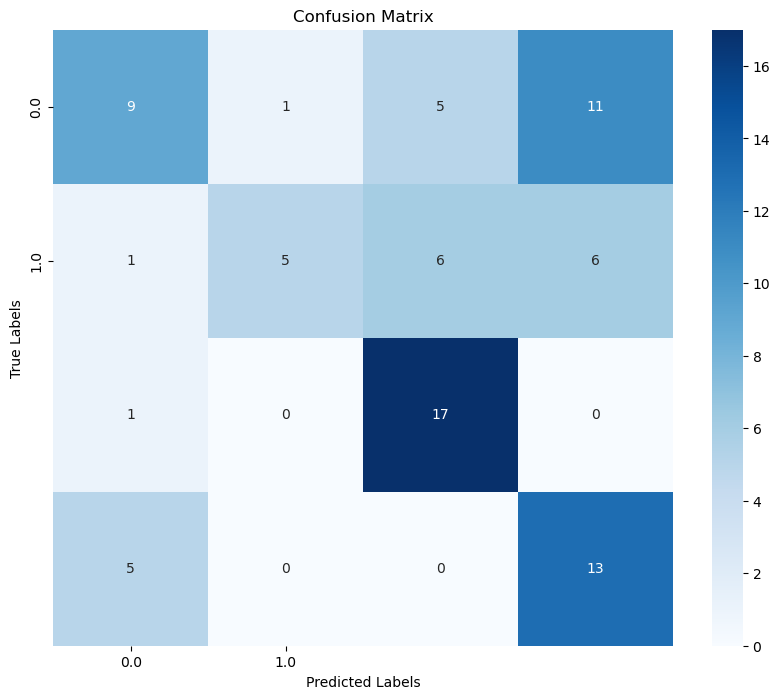

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.35      0.43        26
           1       0.83      0.28      0.42        18
           2       0.61      0.94      0.74        18
           3       0.43      0.72      0.54        18

    accuracy                           0.55        80
   macro avg       0.61      0.57      0.53        80
weighted avg       0.60      0.55      0.52        80



In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar el modelo y obtener predicciones
loss, accuracy = model.evaluate([X_test_general, X_test_mel], y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Obtener las predicciones en el conjunto de prueba
y_pred_proba = model.predict([X_test_general, X_test_mel])
y_pred = np.argmax(y_pred_proba, axis=1)  # Convertir probabilidades a etiquetas

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Mostrar la matriz de confusión usando seaborn para visualizarla mejor
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Calcular otras métricas: precision, recall y f1-score
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred))

In [41]:
model.save('modelo_canciones.keras')


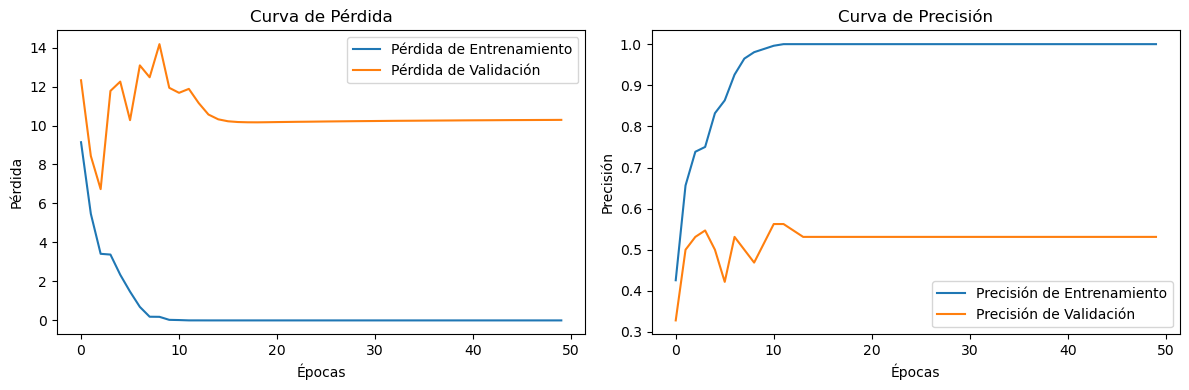

In [42]:
import matplotlib.pyplot as plt

# Graficar la pérdida
plt.figure(figsize=(12, 4))

# Pérdida de entrenamiento
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Curva de Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()
